# **Penerapan Clustering K-Means dan KNN dalam prediksi tingkat kerentanan harian penyebaran penyakit DBD di Jakarta Selatan**

# Kelompok 7 Progress Minggu ke-3
## Finalisasi Program Model AI
### - Penambahan metode Elbow untuk menemukan jumlah cluster yang tepat untuk K-Means
### - Penambahan metode Cross-Validation dan GridSearchCV untuk menemukan jumlah K neighboar yang tepat untuk KNN
### - Finalisasi Labelling pada hasil model

</br>

Link google collab:
https://colab.research.google.com/drive/1mEz8SkYDayKaEQy-dUNrdHOWSClTgo8p?usp=sharing

Anggota Kelompok
1. Reni Uswatun Hasanah (L0122136)
2. Ridlo Abdullah Ulinnuha (L0122138)
3. Rizal Dwi Anggoro (L0122142)

Melakukan Clustering dengan data berikut sebagai parameter:
1.   Kasus DBD
2.   Tingkat curah hujan
3.   Kelembaban rata-rata
4.   Temperature rata-rata
5.   Kepadatan penduduk





NOTE: Ketika ingin menjalankan program, pastikan dataset sudah ada di GoogleDrive/ProjectAI Folder

</br>

## Import Dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

%matplotlib inline

# Menghubungkan ke Google Drive
drive.mount('/content/drive', force_remount=True)

# Mengimpor dataset
df = pd.read_csv('/content/drive/MyDrive/ProjectAI/kelompok7_dataset.csv')
df.head()

Mounted at /content/drive


,tanggal,kasus_dbd,temp_avg,humidity_avg,rainfall_rate,kepadatan_penduduk
0,01-01-2023,12,26.3,87,14.5,15815.54
1,02-01-2023,6,27.5,81,31.5,15815.93
2,03-01-2023,1,26.6,82,0.5,15816.32
3,04-01-2023,0,26.4,86,2.4,15816.71
4,05-01-2023,7,27.4,83,35.3,15817.09


# Memisahkan fitur yang akan digunakan untuk clustering

In [ ]:
features = ['kasus_dbd', 'temp_avg', 'humidity_avg', 'rainfall_rate', 'kepadatan_penduduk']
X = df[features].values
X

array([[1.200000e+01, 2.630000e+01, 8.700000e+01, 1.450000e+01,
        1.581554e+04],
       [6.000000e+00, 2.750000e+01, 8.100000e+01, 3.150000e+01,
        1.581593e+04],
       [1.000000e+00, 2.660000e+01, 8.200000e+01, 5.000000e-01,
        1.581632e+04],
       ...,
       [0.000000e+00, 2.930000e+01, 7.900000e+01, 0.000000e+00,
        1.595275e+04],
       [0.000000e+00, 2.920000e+01, 7.900000e+01, 2.000000e+00,
        1.595314e+04],
       [1.000000e+00, 2.830000e+01, 8.000000e+01, 0.000000e+00,
        1.595354e+04]])

# Standarisasi data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 3.31690938, -2.38587361,  1.86804507,  0.85476717, -1.73302561],
       [ 1.27988427, -1.27214384,  0.9589298 ,  2.28367776, -1.72323298],
       [-0.41763665, -2.10744117,  1.11044902, -0.32198272, -1.71344035],
       ...,
       [-0.75714084,  0.39845081,  0.65589138, -0.3640095 ,  1.71222203],
       [-0.75714084,  0.30564   ,  0.65589138, -0.19590237,  1.72201466],
       [-0.41763665, -0.52965733,  0.80741059, -0.3640095 ,  1.73205838]])

# Visualisasi data sebelum clustering

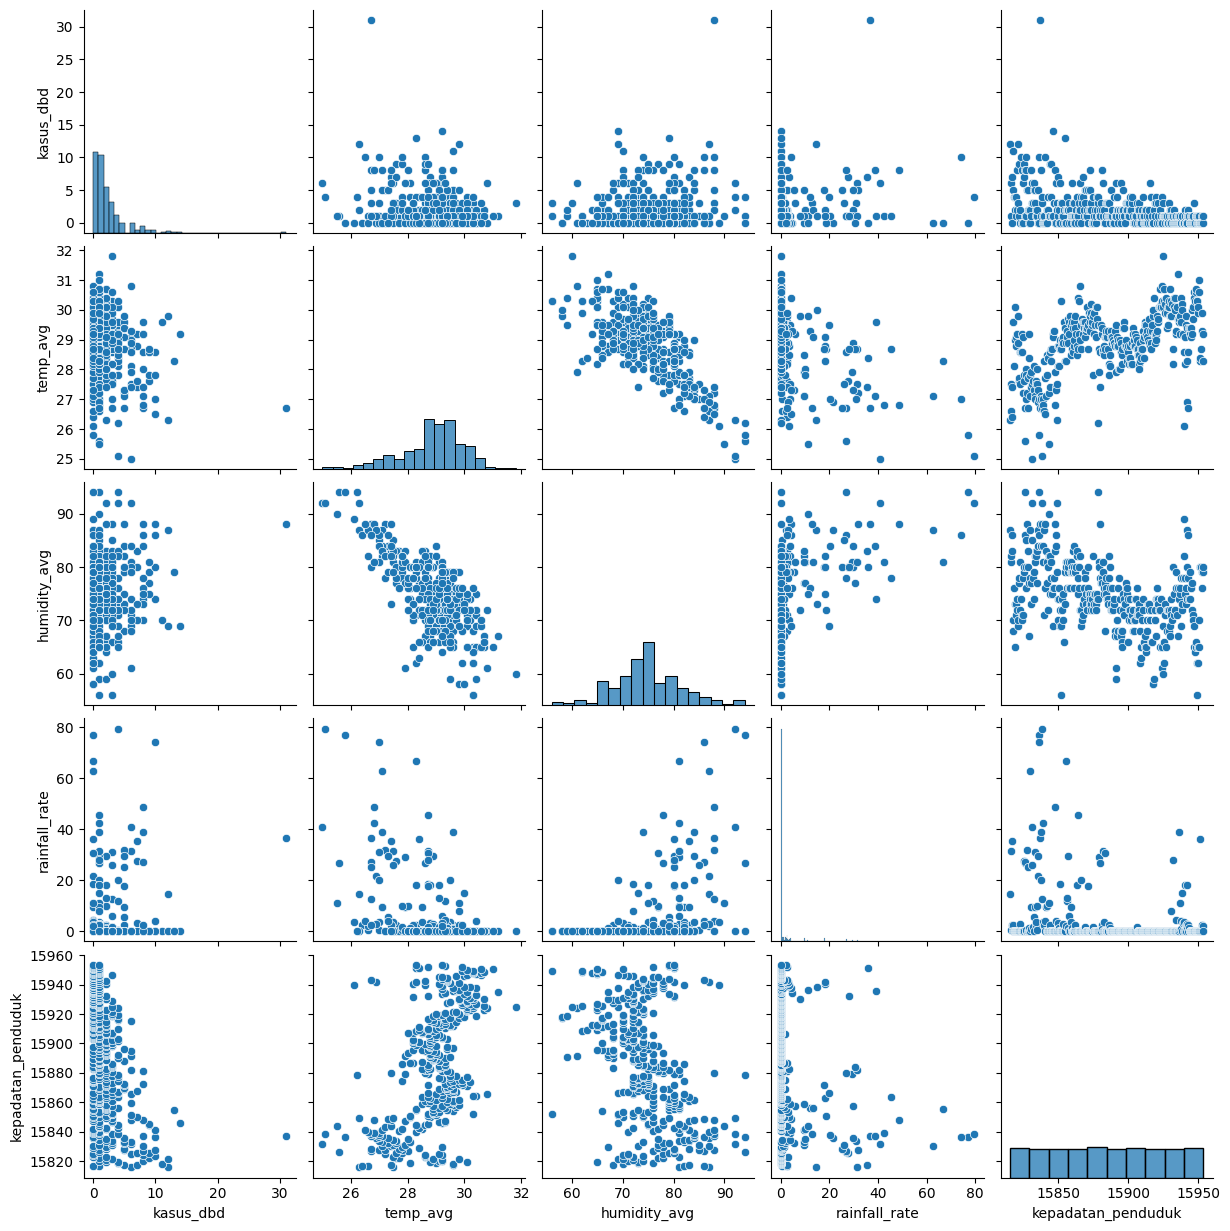

In [ ]:
sns.pairplot(df[features])
plt.show()

# Menentukan jumlah klaster optimal dengan Elbow Method

   Number of Clusters      Inertia
0                   1  1825.000000
1                   2  1226.048239
2                   3   982.283955
3                   4   844.047732
4                   5   723.752238
5                   6   648.619702
6                   7   582.835746
7                   8   524.767632
8                   9   477.932750


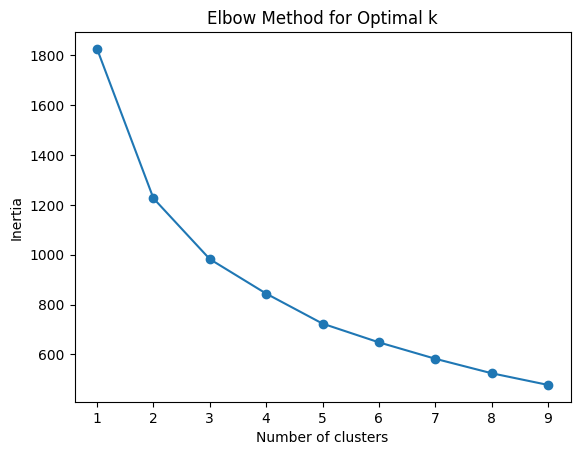

In [ ]:
def find_optimal_clusters(X):
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Menampilkan tabel inertia
    inertia_df = pd.DataFrame({'Number of Clusters': range(1, 10), 'Inertia': inertia})
    print(inertia_df)

    # Menampilkan grafik Elbow Method
    plt.plot(range(1, 10), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

find_optimal_clusters(X_scaled)

# Clustering K-Means

In [ ]:
# Digunakan 3 cluster, karena setelah 3 penurunan inertianya sudah stabil
n_clusters = 3  # menyesuaikan dengan hasil Elbow Method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

# Menambahkan hasil clustering ke dataset
df['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualisasi hasil clustering

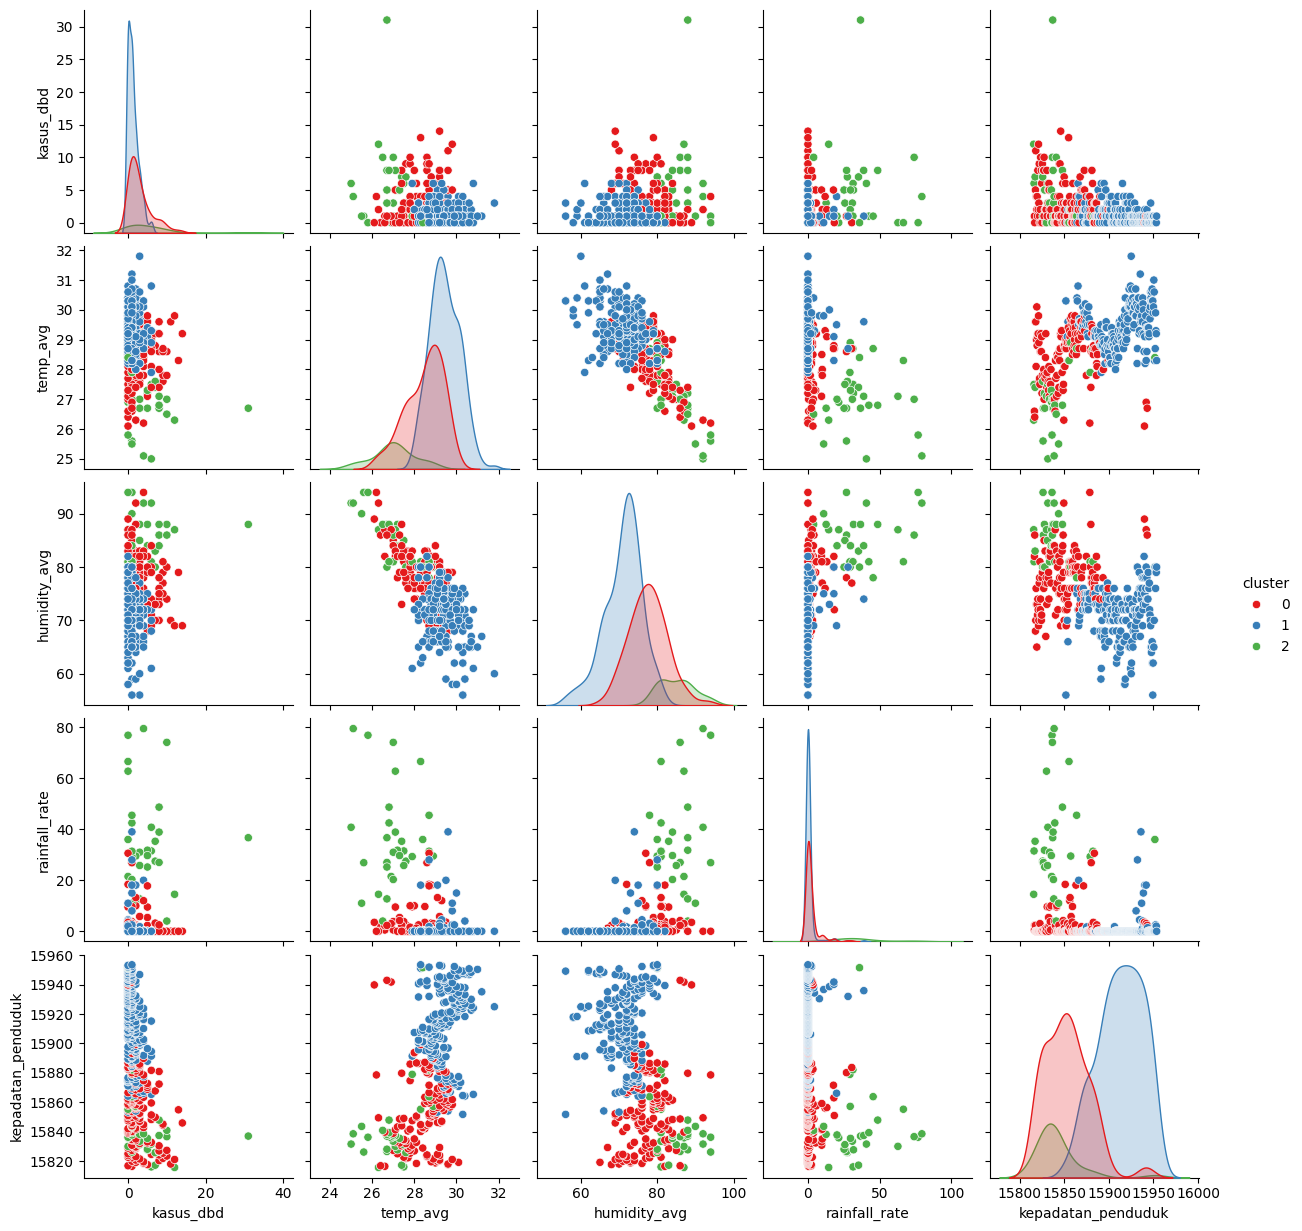

In [ ]:
sns.pairplot(df[features + ['cluster']], hue='cluster', palette='Set1')
plt.show()

# Analisis Hasil Clustering untuk Labeling

In [ ]:
for cluster_id in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_id]
    print(f'\nCluster {cluster_id} statistics:')
    print(cluster_data.describe())




Cluster 0 statistics:
        kasus_dbd    temp_avg  humidity_avg  rainfall_rate  \
count  136.000000  136.000000    136.000000     136.000000   
mean     2.992647   28.471324     77.573529       2.077941   
std      3.034362    0.889103      5.035625       4.872883   
min      0.000000   26.100000     65.000000       0.000000   
25%      1.000000   27.800000     74.000000       0.000000   
50%      2.000000   28.700000     78.000000       0.000000   
75%      4.000000   29.200000     81.000000       2.225000   
max     14.000000   30.100000     94.000000      30.600000   

       kepadatan_penduduk  cluster  
count          136.000000    136.0  
mean         15853.018382      0.0  
std             25.198611      0.0  
min          15816.320000      0.0  
25%          15832.532500      0.0  
50%          15850.705000      0.0  
75%          15868.515000      0.0  
max          15942.960000      0.0  

Cluster 1 statistics:
        kasus_dbd    temp_avg  humidity_avg  rainfall_rate  \


# Labeling

In [ ]:
cluster_labels = {0: 'Medium Risk DBD', 1: 'Low Risk DBD', 2: 'High Risk DBD'}

# Membagi data menjadi data latih dan data uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, clusters, test_size=0.1, random_state=42)

# Mencari jumlah tetangga optimal untuk KNN dengan cross-validation/GridSearchCV

In [ ]:
# Param grid untuk mencari nilai k terbaik
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()

# Mencari nilai k terbaik dengan cross-validation
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)


# Mendapatkan nilai k terbaik dan memastikan ganjil
best_k = knn_gscv.best_params_['n_neighbors']


print("Best number of neighbors:", best_k)
print("Best cross-validated accuracy:", knn_gscv.best_score_)

Best number of neighbors: 18
Best cross-validated accuracy: 0.9327738927738928


# KNN application

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluasi Model

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("{:.2f}%\n".format(accuracy * 100))

# Menampilkan beberapa prediksi dari data test dengan label
predicted_labels = [cluster_labels[label] for label in y_pred]
actual_labels = [cluster_labels[label] for label in y_test]

print("Predicted clusters:\n", predicted_labels[:10])
print("Actual clusters:\n", actual_labels[:10])

# Cross-validation untuk evaluasi model
cv_scores = cross_val_score(knn, X_scaled, clusters, cv=5)
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

94.59%

Predicted clusters:
 ['Low Risk DBD', 'High Risk DBD', 'Medium Risk DBD', 'Low Risk DBD', 'High Risk DBD', 'Low Risk DBD', 'Medium Risk DBD', 'Medium Risk DBD', 'Low Risk DBD', 'Medium Risk DBD']
Actual clusters:
 ['Low Risk DBD', 'High Risk DBD', 'Medium Risk DBD', 'Low Risk DBD', 'High Risk DBD', 'Low Risk DBD', 'Medium Risk DBD', 'Medium Risk DBD', 'Low Risk DBD', 'Medium Risk DBD']

Cross-Validation Scores: [0.61643836 0.95890411 0.94520548 0.83561644 0.73972603]
Mean CV Score: 0.819178082191781


# Saving Model

In [ ]:
joblib.dump(knn, '/content/drive/MyDrive/ProjectAI/knn_model.pkl')
print("Model saved to /content/drive/MyDrive/ProjectAI/knn_model.pkl")

Model saved to /content/drive/MyDrive/ProjectAI/knn_model.pkl


# Prediksi

In [ ]:
loaded_knn = joblib.load('/content/drive/MyDrive/ProjectAI/knn_model.pkl')
# Data baru
new_data = [[10, 25.5, 80, 15, 15000],
            [15, 28.3, 75, 20, 15000],
            [8, 26.8, 82, 10, 20000]]

new_data_scaled = scaler.transform(new_data)

new_predictions = loaded_knn.predict(new_data_scaled)

# Menampilkan label untuk prediksi data baru
new_predictions_labels = [cluster_labels[label] for label in new_predictions]
print("Predictions for new data:", new_predictions_labels)

Predictions for new data: ['Medium Risk DBD', 'Medium Risk DBD', 'Low Risk DBD']
